<a href="https://colab.research.google.com/github/hamzaae/Machine-Learning/blob/main/TravellingSalesmanProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MiniSom** is a minimalistic and *Numpy* based implementation of the Self Organizing Maps (SOM). SOM is a type of *Artificial Neural Network* able to convert complex, nonlinear statistical relationships between ***high-dimensional*** data items into simple geometric relationships on a ***low-dimensional*** display.
---

Let's install it first using pip command:

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=68a1fd142c28ccc40b8e1f9a74f769650ebe7589c27ef39276bf51414925b12c
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


Then importing nessessery modules:

In [ ]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Creating the map points:

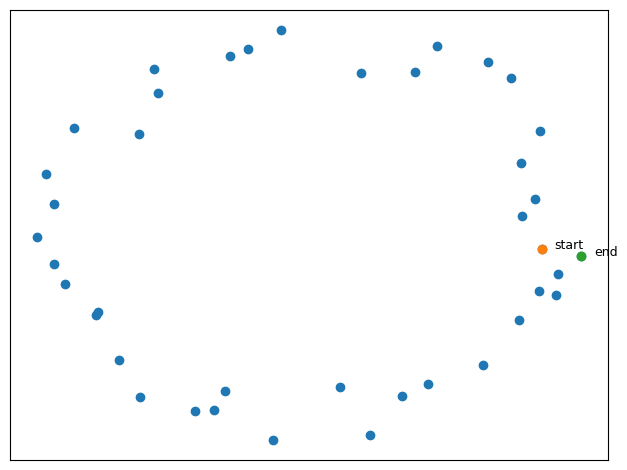

In [ ]:
np.random.RandomState(10)
N_points = 40
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
y = np.sin(t)+(np.random.rand(N_points)-.5)*.3

plt.figure()
plt.scatter(x,y)
plt.scatter(x[0], y[0])
plt.text(x[0]+.05, y[0], 'start', fontsize=9)
plt.scatter(x[-1], y[-1])
plt.text(x[-1]+.05, y[-1], 'end', fontsize=9)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

Looking for the best SOM model with the least error value

In [ ]:
less_error_val = float('inf')
less_error_mdl = None
for N_neurons in [N_points, N_points*2]:
  for s in [2, 4, 8]:
    for lr in [.01, .4, .6]:
      som = MiniSom(1, N_neurons, 2, sigma=s, learning_rate=lr,
                    neighborhood_function='gaussian', random_seed=0)
      points = np.array([x,y]).T
      som.random_weights_init(points)
      if som.quantization_error(points) < less_error_val:
        less_error_val = som.quantization_error(points)
        less_error_mdl = som
print('least', N_neurons, s, lr)


least 80 8 0.6


After finding the best model, lets plot the track of our sales man!

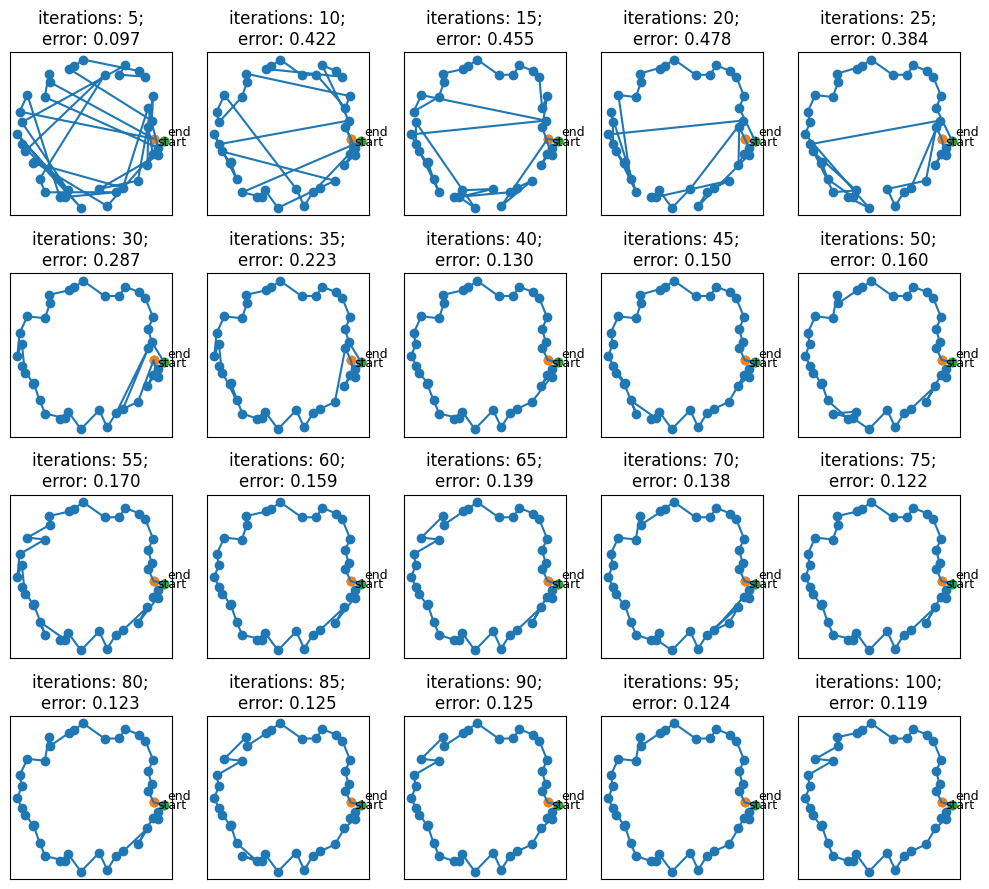

In [ ]:
som = MiniSom(1, N_neurons, 2, sigma=8, learning_rate=0.6,
              neighborhood_function='gaussian', random_seed=0)
points = np.array([x,y]).T
som.random_weights_init(points)

start = np.random.randint(N_points)
end = np.random.randint(N_points)
while end == start:
    end = np.random.randint(N_points)

plt.figure(figsize=(10, 9))
for i, iterations in enumerate(range(5, 101, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(4, 5, i+1)
    plt.scatter(x,y)
    plt.scatter(x[0], y[0])
    plt.text(x[0]+.05, y[0]-.09, 'start', fontsize=9)
    plt.scatter(x[-1], y[-1])
    plt.text(x[-1]+.05, y[-1]+.09, 'end', fontsize=9)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(points[visit_order][:,0], points[visit_order][:,1])
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations,
                                                        e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

